<a href="https://colab.research.google.com/github/greyhound101/internship/blob/master/googlenet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Mounted at /content/gdrive


In [2]:
import scipy.io
import numpy as np
from tqdm import tqdm
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy as np
from keras.optimizers import *
from keras.models import Model
from keras.callbacks import LearningRateScheduler,EarlyStopping,ReduceLROnPlateau
from keras.utils import to_categorical
import gc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from keras.applications import VGG19
from tqdm import tqdm

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
path = F"/content/gdrive/My Drive/check.npy" 
df=np.load(path,allow_pickle=True)
df=df.item()

In [0]:
import cv2
import gc
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]
def convert_1(arr):
  arr=np.where(arr==1,0,arr)
  arr=np.where(arr==2,1,arr)
  arr=np.where(arr==3,2,arr)
  return arr
def cng(img):
    resized = cv2.resize(img, (299,299), interpolation = cv2.INTER_AREA )
    return resized
def get_trn_tst(df,tst_fold):
  idx=np.asarray(df['fold'])
  y=convert_1(np.asarray(df['label']))
  img=np.asarray(df['image'])
  img1=[]
  for i in range(len(img)):
        img1.append(cng(img[i]))
  img1=np.asarray(img1)
  del([img])
  gc.collect()
  trn_y=np.asarray(y[(idx!=tst_fold)])
  trn_img=np.asarray(img1[(idx!=tst_fold)])
  tst_y=np.asarray(y[(idx==tst_fold)])
  tst_img=img1[idx==tst_fold]
  trn_img=np.repeat(trn_img.reshape((trn_img.shape[0],299,299,1)),3,axis=3)
  tst_img=np.repeat(tst_img.reshape((tst_img.shape[0],299,299,1)),3,axis=3)
  return (trn_img.copy(),trn_y.copy()),(tst_img.copy(),tst_y.copy())

In [0]:
import scipy.io
import numpy as np
from tqdm import tqdm
from keras.applications import *
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy as np
from keras.optimizers import *
from keras.models import Model
from keras.callbacks import LearningRateScheduler,EarlyStopping,ReduceLROnPlateau
from keras.utils import to_categorical
import gc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

  0%|          | 0/5 [00:00<?, ?it/s]

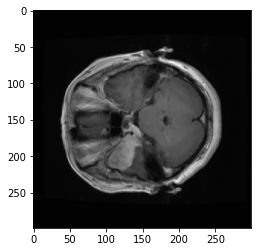

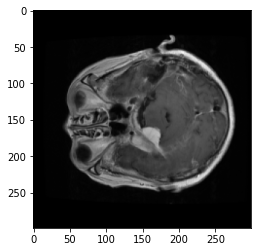

96116736/96112376 [==============================] - 3s 0us/step
Epoch 1/50
2522/2522 [==============================] - 60s 24ms/step - loss: 0.2918 - accuracy: 0.8878
Epoch 2/50
2522/2522 [==============================] - 35s 14ms/step - loss: 0.0727 - accuracy: 0.9766
Epoch 3/50
2522/2522 [==============================] - 34s 14ms/step - loss: 0.0409 - accuracy: 0.9865
Epoch 4/50
2522/2522 [==============================] - 34s 14ms/step - loss: 0.0289 - accuracy: 0.9889
Epoch 5/50
2522/2522 [==============================] - 34s 14ms/step - loss: 0.0471 - accuracy: 0.9837
Epoch 6/50
2522/2522 [==============================] - 34s 14ms/step - loss: 0.0207 - accuracy: 0.9941
Epoch 7/50
2522/2522 [==============================] - 34s 14ms/step - loss: 0.0093 - accuracy: 0.9980
Epoch 8/50
2522/2522 [==============================] - 34s 14ms/step - loss: 0.0283 - accuracy: 0.9893
Epoch 9/50
2522/2522 [==============================] - 34s 14ms/step - loss: 0.0388 - accuracy: 0.9873

 20%|██        | 1/5 [30:00<2:00:02, 1800.56s/it]

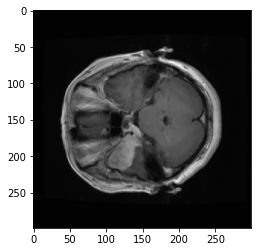

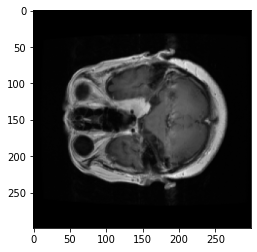

Epoch 1/50
2385/2385 [==============================] - 51s 21ms/step - loss: 0.2736 - accuracy: 0.8960
Epoch 2/50
2385/2385 [==============================] - 33s 14ms/step - loss: 0.0836 - accuracy: 0.9686
Epoch 3/50
2385/2385 [==============================] - 33s 14ms/step - loss: 0.0414 - accuracy: 0.9870
Epoch 4/50
2385/2385 [==============================] - 33s 14ms/step - loss: 0.0350 - accuracy: 0.9883
Epoch 5/50
2385/2385 [==============================] - 33s 14ms/step - loss: 0.0382 - accuracy: 0.9870
Epoch 6/50
2385/2385 [==============================] - 33s 14ms/step - loss: 0.0098 - accuracy: 0.9958
Epoch 7/50
2385/2385 [==============================] - 33s 14ms/step - loss: 0.0556 - accuracy: 0.9845
Epoch 8/50
2385/2385 [==============================] - 33s 14ms/step - loss: 0.0360 - accuracy: 0.9857
Epoch 9/50
2385/2385 [==============================] - 33s 14ms/step - loss: 0.0160 - accuracy: 0.9945
Epoch 10/50
2385/2385 [==============================] - 33s 14m

 40%|████      | 2/5 [58:37<1:28:46, 1775.48s/it]

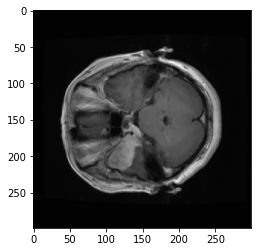

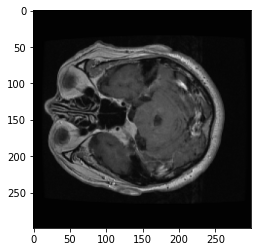

Epoch 1/50
2492/2492 [==============================] - 53s 21ms/step - loss: 0.2469 - accuracy: 0.9053
Epoch 2/50
2492/2492 [==============================] - 34s 14ms/step - loss: 0.0696 - accuracy: 0.9767
Epoch 3/50
2492/2492 [==============================] - 34s 14ms/step - loss: 0.0454 - accuracy: 0.9852
Epoch 4/50
2492/2492 [==============================] - 35s 14ms/step - loss: 0.0310 - accuracy: 0.9896
Epoch 5/50
2492/2492 [==============================] - 35s 14ms/step - loss: 0.0576 - accuracy: 0.9823
Epoch 6/50
2492/2492 [==============================] - 34s 14ms/step - loss: 0.0258 - accuracy: 0.9932
Epoch 7/50
2492/2492 [==============================] - 35s 14ms/step - loss: 0.0118 - accuracy: 0.9972
Epoch 8/50
2492/2492 [==============================] - 34s 14ms/step - loss: 0.0140 - accuracy: 0.9964
Epoch 9/50
2492/2492 [==============================] - 34s 14ms/step - loss: 0.0126 - accuracy: 0.9956
Epoch 10/50
2492/2492 [==============================] - 34s 14m

 60%|██████    | 3/5 [1:28:31<59:21, 1780.88s/it]

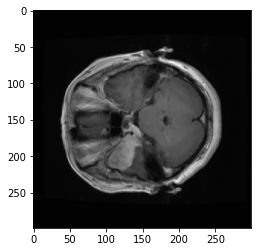

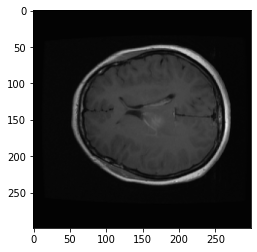

Epoch 1/50
2436/2436 [==============================] - 52s 21ms/step - loss: 0.2827 - accuracy: 0.8822
Epoch 2/50
2436/2436 [==============================] - 34s 14ms/step - loss: 0.1178 - accuracy: 0.9581
Epoch 3/50
2436/2436 [==============================] - 34s 14ms/step - loss: 0.0580 - accuracy: 0.9803
Epoch 4/50
2436/2436 [==============================] - 34s 14ms/step - loss: 0.0271 - accuracy: 0.9893
Epoch 5/50
2436/2436 [==============================] - 34s 14ms/step - loss: 0.0761 - accuracy: 0.9762
Epoch 6/50
2436/2436 [==============================] - 34s 14ms/step - loss: 0.0207 - accuracy: 0.9926
Epoch 7/50
2436/2436 [==============================] - 34s 14ms/step - loss: 0.0138 - accuracy: 0.9967
Epoch 8/50
2436/2436 [==============================] - 34s 14ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 9/50
2436/2436 [==============================] - 34s 14ms/step - loss: 0.0151 - accuracy: 0.9955
Epoch 10/50
2436/2436 [==============================] - 34s 14m

 80%|████████  | 4/5 [1:57:48<29:33, 1773.93s/it]

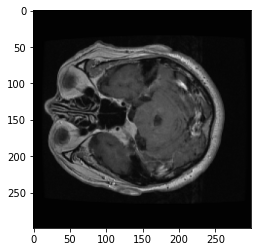

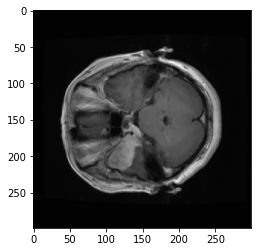

Epoch 1/50
2421/2421 [==============================] - 52s 22ms/step - loss: 0.2330 - accuracy: 0.9071
Epoch 2/50
2421/2421 [==============================] - 34s 14ms/step - loss: 0.0628 - accuracy: 0.9810
Epoch 3/50
2421/2421 [==============================] - 33s 14ms/step - loss: 0.0563 - accuracy: 0.9785
Epoch 4/50
2421/2421 [==============================] - 34s 14ms/step - loss: 0.0531 - accuracy: 0.9810
Epoch 5/50
2421/2421 [==============================] - 33s 14ms/step - loss: 0.0133 - accuracy: 0.9959
Epoch 6/50
2421/2421 [==============================] - 33s 14ms/step - loss: 0.0407 - accuracy: 0.9864
Epoch 7/50
2421/2421 [==============================] - 33s 14ms/step - loss: 0.0171 - accuracy: 0.9946
Epoch 8/50
2421/2421 [==============================] - 33s 14ms/step - loss: 0.0174 - accuracy: 0.9955
Epoch 9/50
2421/2421 [==============================] - 33s 14ms/step - loss: 0.0049 - accuracy: 0.9988
Epoch 10/50
2421/2421 [==============================] - 33s 14m

100%|██████████| 5/5 [2:26:57<00:00, 1763.55s/it]


In [16]:
from keras.callbacks import *
import gc
import keras
from keras.layers import *
from keras import backend as K
gc.collect()
K.clear_session()
class ck(Callback):
    def __init__(self):
        self.max=756
        self.lr=1
        self.count=1
        self.loss=[]
        self.lrs=[]
    def on_epoch_end(self,epoch,logs=None):
        self.loss.append(logs.get('loss'))
        self.count+=1
    def on_epoch_begin(self,epoch,logs=None):
        lr=self.lr-self.count*(1-1e-6)/756
        self.lrs.append(lr)
        K.set_value(self.model.optimizer.lr, lr)
final_result=[]
preds=[]
answers=[]
history=[]
for index in tqdm(range(1,6)):
  K.clear_session()
  ep=50
  gc.collect()
  trn,tst=get_trn_tst(df,index)
  plt.imshow(trn[0][0])
  plt.show()
  plt.imshow(tst[0][0])
  plt.show()
  trn_x,trn_y=unison_shuffled_copies(trn[0],trn[1])
  tst_x,tst_y=unison_shuffled_copies(tst[0],tst[1])
  del([trn,tst])
  gc.collect()
  mod=InceptionV3(include_top=True, weights='imagenet')
  out_1=mod.layers[-2].output
  drp=Dropout(0.5)(out_1)
  out=Dense(3,activation='softmax')(drp)
  model=Model(inputs=mod.input,outputs=out)
  #training last layer
  cll=ck()
  esr=EarlyStopping(patience=2,min_delta=0.1,restore_best_weights=True)
  model.compile(optimizer=Adam(3e-4), 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])
  gc.collect()


  #adding l1 regularisation
  regularizer = keras.regularizers.l1(0.8)
  for layer in model.layers:
    for attr in ['kernel_regularizer']:
        if hasattr(layer, attr):
          setattr(layer, attr, regularizer)


  #training the model
  hist=model.fit(trn_x,to_categorical(trn_y),batch_size=32,epochs=ep)
  history.append(hist.history)
  pre=model.predict(tst_x)
  preds.append(pre)
  answers.append(tst_y)
  del([trn_x,tst_x,model])
  gc.collect()
  final_result.append(accuracy_score(tst_y,np.argmax(pre,1)))
  gc.collect()

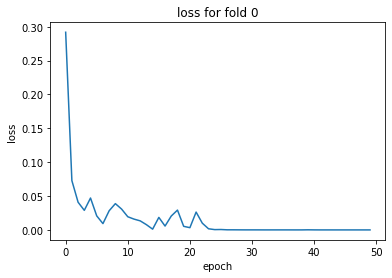

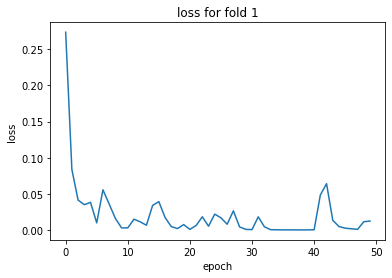

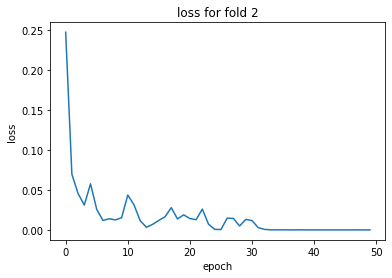

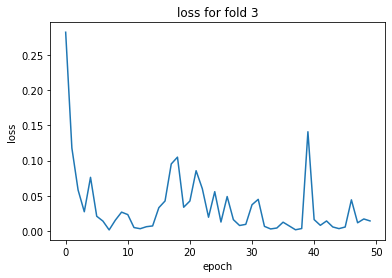

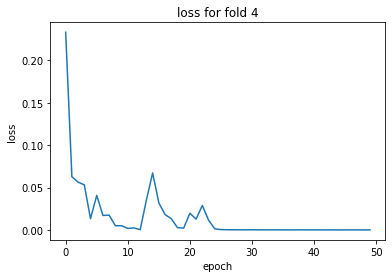

In [17]:
from matplotlib import pyplot as plt
for i in range(5):
    plt.plot(history[i]['loss'])
    plt.title('loss for fold '+str(i))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

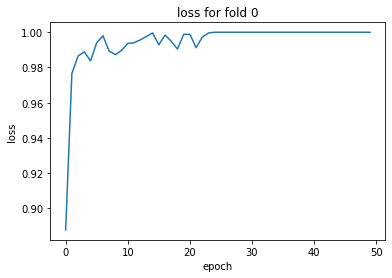

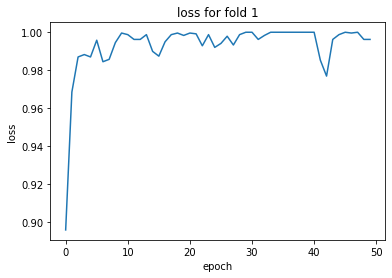

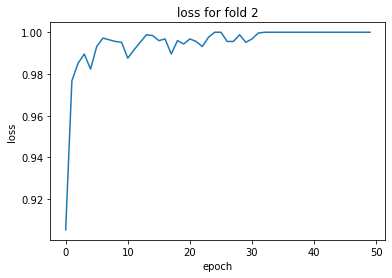

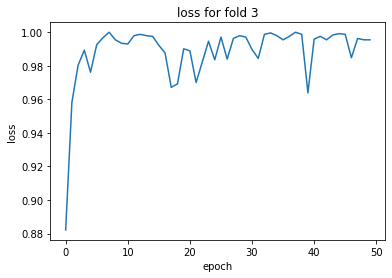

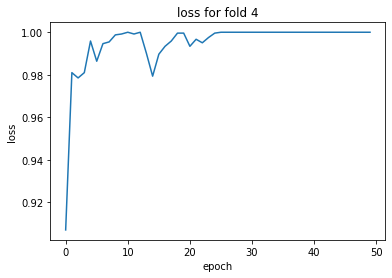

In [18]:
from matplotlib import pyplot as plt
for i in range(5):
    plt.plot(history[i]['accuracy'])
    plt.title('loss for fold '+str(i))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [19]:
np.mean(final_result)

0.9402219022512093

In [0]:
cm=[]
for i in preds:
  cm.append(np.argmax(i,1))

In [0]:
from sklearn.metrics import confusion_matrix
conf=[]
for i in range(len(cm)):
  conf.append(confusion_matrix(answers[i],cm[i]))

In [22]:
conf[0]

array([[111,   1,   0],
       [  6, 239,   0],
       [  3,  12, 170]])

In [23]:
conf[1]

array([[138,  19,  10],
       [  1, 327,  10],
       [  1,   2, 171]])

In [24]:
conf[2]

array([[132,   4,   3],
       [ 27, 204,   0],
       [  0,   0, 202]])

In [25]:
conf[3]

array([[104,   4,  16],
       [ 13, 307,   5],
       [  9,   1, 169]])

In [26]:
conf[4]

array([[143,   0,  23],
       [ 15, 272,   0],
       [  0,   0, 190]])